<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#How-to-get-to-TOP-25%-with-Simple-Model-using-sklearn-only" data-toc-modified-id="How-to-get-to-TOP-25%-with-Simple-Model-using-sklearn-only-1">How to get to TOP 25% with Simple Model using sklearn only</a></span><ul class="toc-item"><li><span><a href="#by-Sergei-Neviadomski" data-toc-modified-id="by-Sergei-Neviadomski-1.1">by Sergei Neviadomski</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries-and-data" data-toc-modified-id="Importing-libraries-and-data-1.1.1">Importing libraries and data</a></span></li><li><span><a href="#Checking-for-NAs" data-toc-modified-id="Checking-for-NAs-1.1.2">Checking for NAs</a></span></li><li><span><a href="#Importing-my-functions" data-toc-modified-id="Importing-my-functions-1.1.3">Importing my functions</a></span></li><li><span><a href="#Splitting-to-features-and-labels-and-deleting-variables-I-don't-need" data-toc-modified-id="Splitting-to-features-and-labels-and-deleting-variables-I-don't-need-1.1.4">Splitting to features and labels and deleting variables I don't need</a></span></li><li><span><a href="#Filling-NAs-and-converting-features" data-toc-modified-id="Filling-NAs-and-converting-features-1.1.5">Filling NAs and converting features</a></span></li><li><span><a href="#Log-transformation" data-toc-modified-id="Log-transformation-1.1.6">Log transformation</a></span></li><li><span><a href="#Standardizing-numeric-data" data-toc-modified-id="Standardizing-numeric-data-1.1.7">Standardizing numeric data</a></span></li><li><span><a href="#Converting-categorical-data-to-dummies" data-toc-modified-id="Converting-categorical-data-to-dummies-1.1.8">Converting categorical data to dummies</a></span></li><li><span><a href="#Obtaining-standardized-dataset" data-toc-modified-id="Obtaining-standardized-dataset-1.1.9">Obtaining standardized dataset</a></span></li><li><span><a href="#Splitting-train-and-test-features" data-toc-modified-id="Splitting-train-and-test-features-1.1.10">Splitting train and test features</a></span></li><li><span><a href="#Splitting-to-train-and-validation-sets" data-toc-modified-id="Splitting-to-train-and-validation-sets-1.1.11">Splitting to train and validation sets</a></span></li></ul></li><li><span><a href="#First-level-models" data-toc-modified-id="First-level-models-1.2">First level models</a></span><ul class="toc-item"><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-1.2.1">Elastic Net</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-1.2.2">Gradient Boosting</a></span></li></ul></li><li><span><a href="#Ensembling-final-model" data-toc-modified-id="Ensembling-final-model-1.3">Ensembling final model</a></span><ul class="toc-item"><li><span><a href="#I'll-be-glad-to-hear-suggestions-on-improving-my-models." data-toc-modified-id="I'll-be-glad-to-hear-suggestions-on-improving-my-models.-1.3.1">I'll be glad to hear suggestions on improving my models.</a></span></li></ul></li></ul></li></ul></div>

# How to get to TOP 25% with Simple Model using sklearn only

## by Sergei Neviadomski

### Importing libraries and data

That's my simple ensemble model that helped me to get to top 40%. I'll try to briefly show you all steps that I made during my analysis and model building.

In [14]:
# Adding needed libraries and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [15]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Checking for NAs

In [16]:
#Checking for missing data
NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]

,Train,Test
Alley,1911,821.0
Bsmt Cond,55,25.0
Bsmt Exposure,58,25.0
Bsmt Full Bath,2,0.0
Bsmt Half Bath,2,0.0
Bsmt Qual,55,25.0
Bsmt Unf SF,1,0.0
BsmtFin SF 1,1,0.0
BsmtFin SF 2,1,0.0
BsmtFin Type 1,55,25.0


### Importing my functions

In [10]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

### Splitting to features and labels and deleting variables I don't need

In [13]:
train

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,3,2010,WD
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2009,WD
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,1,2010,WD
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2010,WD
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,3,2010,WD
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,6,2006,New
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,Shed,400,6,2007,WD
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,0,NaN,NaN,NaN,0,9,2007,WD


In [17]:
# Spliting to features and lables and deleting variable I don't need
train_labels = train.pop('SalePrice')

features = pd.concat([train, test], keys=['train', 'test'])

# I decided to get rid of features that have more than half of missing information or do not correlate to SalePrice
# features.drop(['Utilities', 'Roof Matl', 'Mas Vnr Area', 'BsmtFin SF1', 'BsmtFin SF2', 'BsmtUn fSF', 'Heating', 'LowQualFinSF',
#                'Bsmt Full Bath', 'Bsmt Half Bath', 'Functional', 'Garage Yr Blt', 'Garage Area', 'Garage Cond', 'Wood Deck SF',
#                'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val'],
#               axis=1, inplace=True)

In [20]:
train_labels

0       130500
1       220000
2       109000
3       174000
4       138500
5       190000
6       140000
7       142000
8       112500
9       135000
10       85400
11      183600
12      131000
13      200000
14      193000
15      173500
16       98000
17      139000
18      143500
19      215200
20      129000
21      278000
22      344133
23      185000
24      145000
25      187500
26      138500
27      198000
28      119600
29      122900
         ...  
2021    195800
2022    223000
2023    192000
2024    197000
2025    298236
2026    238000
2027    119000
2028    262500
2029    425000
2030    102776
2031    149900
2032    190000
2033    162500
2034    217000
2035    137500
2036    270000
2037    142500
2038    161000
2039     93900
2040    225000
2041    412500
2042     83000
2043    128000
2044    182000
2045    394617
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

### Filling NAs and converting features

In [29]:
# MSSubClass as str
features['MSSubClass'] = features['MSSubClass'].astype(str)

# MSZoning NA in pred. filling with most popular values
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

# LotFrontage  NA in all. I suppose NA means 0
features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean())

# Alley  NA in all. NA means no access
features['Alley'] = features['Alley'].fillna('NOACCESS')

# Converting OverallCond to str
features.OverallCond = features.OverallCond.astype(str)

# MasVnrType NA in all. filling with most popular values
features['MasVnrType'] = features['MasVnrType'].fillna(features['MasVnrType'].mode()[0])

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# NA in all. NA means No basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('NoBSMT')

# TotalBsmtSF  NA in pred. I suppose NA means 0
features['TotalBsmtSF'] = features['TotalBsmtSF'].fillna(0)

# Electrical NA in pred. filling with most popular values
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])

# KitchenAbvGr to categorical
features['KitchenAbvGr'] = features['KitchenAbvGr'].astype(str)

# KitchenQual NA in pred. filling with most popular values
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])

# FireplaceQu  NA in all. NA means No Fireplace
features['FireplaceQu'] = features['FireplaceQu'].fillna('NoFP')

# GarageType, GarageFinish, GarageQual  NA in all. NA means No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    features[col] = features[col].fillna('NoGRG')

# GarageCars  NA in pred. I suppose NA means 0
features['GarageCars'] = features['GarageCars'].fillna(0.0)

# SaleType NA in pred. filling with most popular values
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

# Year and Month to categorical
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

### Log transformation

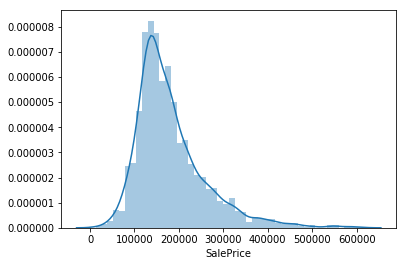

In [21]:
# Our SalesPrice is skewed right (check plot below). I'm logtransforming it. 
ax = sns.distplot(train_labels)

In [31]:
## Log transformation of labels
train_labels = np.log(train_labels)

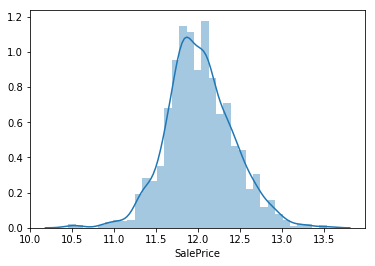

In [32]:
## Now it looks much better
ax = sns.distplot(train_labels)

### Standardizing numeric data

In [33]:
## Standardizing numeric features
numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

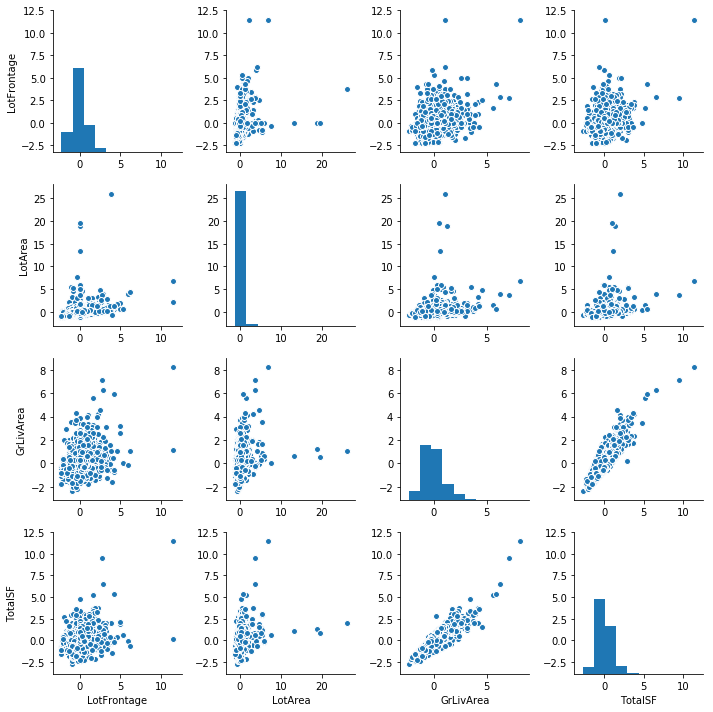

In [34]:
ax = sns.pairplot(numeric_features_standardized)

### Converting categorical data to dummies

In [35]:
# Getting Dummies from Condition1 and Condition2
conditions = set([x for x in features['Condition1']] + [x for x in features['Condition2']])
dummies = pd.DataFrame(data=np.zeros((len(features.index), len(conditions))),
                       index=features.index, columns=conditions)
for i, cond in enumerate(zip(features['Condition1'], features['Condition2'])):
    dummies.ix[i, cond] = 1
features = pd.concat([features, dummies.add_prefix('Condition_')], axis=1)
features.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

# Getting Dummies from Exterior1st and Exterior2nd
exteriors = set([x for x in features['Exterior1st']] + [x for x in features['Exterior2nd']])
dummies = pd.DataFrame(data=np.zeros((len(features.index), len(exteriors))),
                       index=features.index, columns=exteriors)
for i, ext in enumerate(zip(features['Exterior1st'], features['Exterior2nd'])):
    dummies.ix[i, ext] = 1
features = pd.concat([features, dummies.add_prefix('Exterior_')], axis=1)
features.drop(['Exterior1st', 'Exterior2nd', 'Exterior_nan'], axis=1, inplace=True)

# Getting Dummies from all other categorical vars
for col in features.dtypes[features.dtypes == 'object'].index:
    for_dummy = features.pop(col)
    features = pd.concat([features, pd.get_dummies(for_dummy, prefix=col)], axis=1)

### Obtaining standardized dataset

In [36]:
### Copying features
features_standardized = features.copy()

### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)

### Splitting train and test features

In [37]:
### Splitting features
train_features = features.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features = features.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

### Splitting standardized features
train_features_st = features_standardized.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features_st = features_standardized.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

### Splitting to train and validation sets

In [38]:
### Shuffling train sets
train_features_st, train_features, train_labels = shuffle(train_features_st, train_features, train_labels, random_state = 5)

In [39]:
### Splitting
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)

## First level models

My analysis revealed that Gradient Boosting and Elastic Net (using Standardized Features) show best results.

### Elastic Net

I'm using ElasticNetCV estimator to choose best alpha and l1_ratio for my Elastic Net model.

In [40]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train_st, y_train_st)
train_test(ENSTest, x_train_st, x_test_st, y_train_st, y_test_st)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.9009282811227118
RMSE: 0.11921419970776548
Test
R2: 0.8967299621752309
RMSE: 0.11097042344597478


In [41]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(ENSTest, train_features_st, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.10)


### Gradient Boosting

We use a lot of features and have many outliers. So I'm using max_features='sqrt' to reduce overfitting of my model. I also use loss='huber' because it more tolerant to outliers. All other hyper-parameters was chosen using GridSearchCV.

In [42]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
train_test(GBest, x_train, x_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.9628332698318184
RMSE: 0.07506183678696501
Test
R2: 0.9140211466268429
RMSE: 0.1018930745287254


In [43]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, train_features_st, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.04)


## Ensembling final model

My final ensemble model is an average of Gradient Boosting and Elastic Net predictions. But before that I retrained my models on all train data.

In [44]:
# Retraining models
GB_model = GBest.fit(train_features, train_labels)
ENST_model = ENSTest.fit(train_features_st, train_labels)

In [45]:
## Getting our SalePrice estimation
Final_labels = (np.exp(GB_model.predict(test_features)) + np.exp(ENST_model.predict(test_features_st))) / 2

In [46]:
## Saving to CSV
pd.DataFrame({'Id': test.Id, 'SalePrice': Final_labels}).to_csv('2017-02-28.csv', index =False)    

### I'll be glad to hear suggestions on improving my models.
